In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
# warning
import warnings
warnings.filterwarnings("ignore")
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [19]:
seoul_pop_area = pd.read_csv('../data/cafe/seoul_pop_area.csv').drop('Unnamed: 0', axis=1)
seoul_pop_area

,기간,자치구행정동명,인구,면적,인구밀도
0,2015,강남구 개포1동,21700,1.27,17087
1,2015,강남구 개포2동,27354,2.51,10898
2,2015,강남구 개포4동,22135,1.49,14856
3,2015,강남구 논현1동,25307,1.25,20246
4,2015,강남구 논현2동,23082,1.47,15702
...,...,...,...,...,...
2115,2019,중랑구 상봉2동,19844,0.68,29182
2116,2019,중랑구 신내1동,40854,2.53,16148
2117,2019,중랑구 신내2동,21905,0.99,22126
2118,2019,중랑구 중화1동,20916,0.68,30759


- (서울)운영영업개월평균: 해당 행정동의 운영중 점포들의 평균 영업 개월 수 
- (서울)폐업영업개월평균: 해당 행정동의 폐업한 점포들의 평균 영업 개월 수

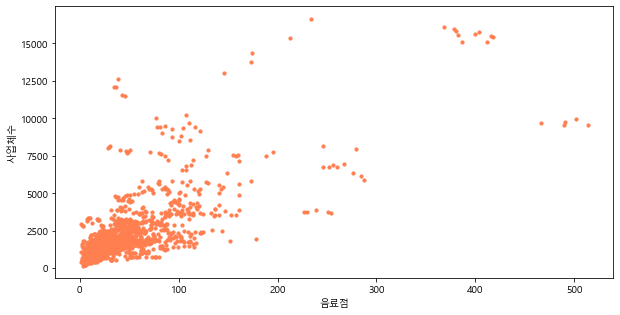

In [20]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "사업체수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

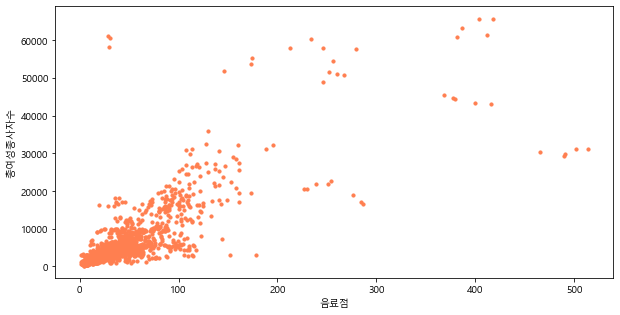

In [21]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "총여성종사자수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

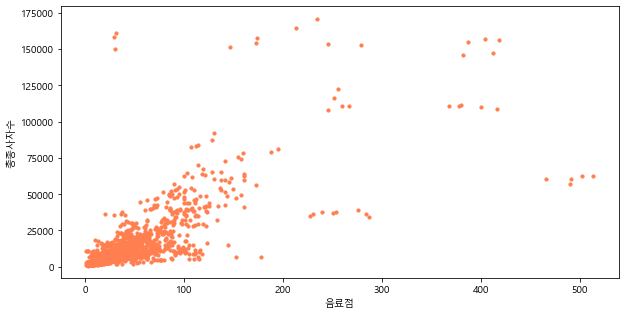

In [22]:
df_f.plot(
  kind = "scatter",
  x = "음료점",
  y = "총종사자수",
  c = "coral", # color로 바꿔도 됨
  s = 10, # 점 크기
  figsize = (10, 5)
)
plt.show()

In [23]:
df3 = pd.read_csv('../Data/cafe_seoul_analysis_03.csv', encoding='euc-kr').iloc[:,1:]
df3.head()

,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [24]:
df3 = df3[['기간', '자치구', '동', '음료점']]
df3.head()

,기간,자치구,동,음료점
0,2015,강남구,개포1동,4
1,2015,강남구,개포2동,14
2,2015,강남구,개포4동,31
3,2015,강남구,논현1동,103
4,2015,강남구,논현2동,128


In [25]:
df3.tail()

,기간,자치구,동,음료점
2110,2019,중랑구,상봉2동,44
2111,2019,중랑구,신내1동,37
2112,2019,중랑구,신내2동,14
2113,2019,중랑구,중화1동,14
2114,2019,중랑구,중화2동,26


In [26]:
df3.duplicated(['기간','자치구', '동']) 

0       False
1       False
2       False
3       False
4       False
        ...  
2110    False
2111    False
2112    False
2113    False
2114    False
Length: 2115, dtype: bool

In [27]:
df3 = df3.groupby(['기간', '자치구', '동']).sum()
df3

음료점
기간   자치구 동        
2015 강남구 개포1동    4
         개포2동   14
         개포4동   31
         논현1동  103
         논현2동  128
...            ...
2019 중랑구 상봉2동   44
         신내1동   37
         신내2동   14
         중화1동   14
         중화2동   26

[2115 rows x 1 columns]

In [28]:
df3.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

In [29]:
df3.to_csv('../Data/TargetData.csv')

In [30]:
pd.read_csv('../Data/TargetData.csv')

,Unnamed: 0,기간,자치구,동,음료점
0,0,2015,강남구,개포1동,4
1,1,2015,강남구,개포2동,14
2,2,2015,강남구,개포4동,31
3,3,2015,강남구,논현1동,103
4,4,2015,강남구,논현2동,128
...,...,...,...,...,...
2110,2110,2019,중랑구,상봉2동,44
2111,2111,2019,중랑구,신내1동,37
2112,2112,2019,중랑구,신내2동,14
2113,2113,2019,중랑구,중화1동,14


In [31]:
df3[df3.기간 == 2015]

,기간,자치구,동,음료점
0,2015,강남구,개포1동,4
1,2015,강남구,개포2동,14
2,2015,강남구,개포4동,31
3,2015,강남구,논현1동,103
4,2015,강남구,논현2동,128
...,...,...,...,...
418,2015,중랑구,상봉2동,28
419,2015,중랑구,신내1동,20
420,2015,중랑구,신내2동,13
421,2015,중랑구,중화1동,13


---
### Correlation

In [32]:
np.corrcoef(df_f.총종사자수, df_f.음료점)

array([[1.        , 0.76364305],
       [0.76364305, 1.        ]])

In [33]:
np.corrcoef(df_f.총여성종사자수, df_f.음료점)

array([[1.        , 0.80062366],
       [0.80062366, 1.        ]])

In [34]:
np.corrcoef(df_f.사업체수, df_f.음료점)

array([[1.       , 0.7545529],
       [0.7545529, 1.       ]])

In [35]:
np.corrcoef(df_f.한식음식점업, df_f.음료점)

array([[1.       , 0.8685352],
       [0.8685352, 1.       ]])

> 높은 관계가 예상되는 총종사자수, 총여성종사자수, 사업체수, 한식음식점업 Feature의 Corr은 높은 양의 상관관계를 보인다.

In [36]:
np.corrcoef(df_f['육류 소매업'], df_f.음료점)

array([[ 1.       , -0.0305612],
       [-0.0305612,  1.       ]])

In [37]:
np.corrcoef(df_f['두발미용업'], df_f.음료점)

array([[1.        , 0.49186359],
       [0.49186359, 1.        ]])

> 반대로 낮은 관계가 예상되는 육류 소매업과 두발 미용업과 같은 Feature의 Corr은 낮게 나온다.

In [42]:
df_f.shape, seoul_pop_area.shape

((2105, 30), (2250, 6))

In [50]:
print(len(df_f.자치구행정동명.unique()))
print(len(seoul_pop_area.동.unique()))

422
425


In [148]:
df_f.isnull().sum()

기간                  0
자치구행정동명             0
한식음식점업              0
용달 및 개별화물 자동차운송업    0
부동산자문 및 중개업         0
의류점                 0
기타주점업               0
두발미용업               0
슈퍼마켓                0
분식 및 김밥전문점          0
비알콜 음료점             0
가정용 세탁업             0
노래연습장 운영업           0
체인화 편의점             0
치킨 전문점              0
자동차 전문 수리업          0
과실 및 채소소매업          0
육류 소매업              0
중국 음식점업             0
당구장 운영업             0
제과점업                0
컴퓨터게임방 운영업          0
음료점                 0
사업체수                0
총종사자수               0
총여성종사자수             0
운영평균                0
폐업평균                0
서울운영평균              0
서울시폐업평균             0
dtype: int64

In [150]:
df.columns

Index(['기간', '자치구행정동명', '한식음식점업', '용달 및 개별화물 자동차운송업', '부동산자문 및 중개업', '의류점',
       '기타주점업', '두발미용업', '슈퍼마켓', '분식 및 김밥전문점', '비알콜 음료점', '가정용 세탁업',
       '노래연습장 운영업', '체인화 편의점', '치킨 전문점', '자동차 전문 수리업', '과실 및 채소소매업', '육류 소매업',
       '중국 음식점업', '당구장 운영업', '제과점업', '컴퓨터게임방 운영업'],
      dtype='object')

In [155]:
df.rename(columns={'기간':'기간','자치구행정동명':'자치구행정동명', '한식음식점업':'한식', '용달 및 개별화물 자동차운송업':'용달운송', '부동산자문 및 중개업':'부동산', '의류점':'옷가게', '기타주점업':'주점', '두발미용업':'미용실', '슈퍼마켓':'슈퍼마켓', '분식 및 김밥전문점':'분식', '비알콜 음료점':'음료점', '가정용 세탁업':'세탁소', '노래연습장 운영업':'노래방', '체인화 편의점':'편의점', '치킨 전문점':'치킨집', '자동차 전문 수리업':'카센터', '과실 및 채소소매업':'과일채소가게', '육류 소매업':'정육점', '중국 음식점업':'중국집', '당구장 운영업':'당구장', '제과점업':'빵집', '컴퓨터게임방 운영업':'pc방'}, inplace=True)
df.head()

,기간,자치구행정동명,한식,용달운송,부동산,옷가게,주점,미용실,슈퍼마켓,분식,...,노래방,편의점,치킨집,카센터,과일채소가게,정육점,중국집,당구장,빵집,pc방
0,2015,종로구 사직동,334,17,56,45,91,22,34,43,...,12,28,12,5,5,2,22,10,20,3
1,2015,종로구 삼청동,64,8,2,59,6,1,16,23,...,0,9,0,0,0,0,3,0,10,0
2,2015,종로구 부암동,27,13,14,14,12,9,9,11,...,2,9,2,8,0,0,5,1,3,1
3,2015,종로구 평창동,60,17,31,15,27,17,13,8,...,2,6,3,4,2,6,6,2,7,2
4,2015,종로구 무악동,12,329,10,4,3,10,5,7,...,2,4,4,2,2,2,2,0,2,2


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       2115 non-null   int64 
 1   자치구행정동명  2115 non-null   object
 2   한식       2115 non-null   int64 
 3   용달운송     2115 non-null   int64 
 4   부동산      2115 non-null   int64 
 5   옷가게      2115 non-null   int64 
 6   주점       2115 non-null   int64 
 7   미용실      2115 non-null   int64 
 8   슈퍼마켓     2115 non-null   int64 
 9   분식       2115 non-null   int64 
 10  음료점      2115 non-null   int64 
 11  세탁소      2115 non-null   int64 
 12  노래방      2115 non-null   int64 
 13  편의점      2115 non-null   int64 
 14  치킨집      2115 non-null   int64 
 15  카센터      2115 non-null   int64 
 16  과일채소가게   2115 non-null   int64 
 17  정육점      2115 non-null   int64 
 18  중국집      2115 non-null   int64 
 19  당구장      2115 non-null   int64 
 20  빵집       2115 non-null   int64 
 21  pc방      2115 non-null   int64 
dtype

In [160]:
df

,기간,자치구행정동명,한식,용달운송,부동산,옷가게,주점,미용실,슈퍼마켓,분식,...,노래방,편의점,치킨집,카센터,과일채소가게,정육점,중국집,당구장,빵집,pc방
0,2015,종로구 사직동,334,17,56,45,91,22,34,43,...,12,28,12,5,5,2,22,10,20,3
1,2015,종로구 삼청동,64,8,2,59,6,1,16,23,...,0,9,0,0,0,0,3,0,10,0
2,2015,종로구 부암동,27,13,14,14,12,9,9,11,...,2,9,2,8,0,0,5,1,3,1
3,2015,종로구 평창동,60,17,31,15,27,17,13,8,...,2,6,3,4,2,6,6,2,7,2
4,2015,종로구 무악동,12,329,10,4,3,10,5,7,...,2,4,4,2,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,2019,강동구 성내3동,201,83,104,49,63,83,12,42,...,30,21,20,18,22,17,15,18,23,12
2111,2019,강동구 둔촌2동,100,118,61,20,26,62,12,21,...,15,17,10,14,3,11,7,6,7,6
2112,2019,강동구 암사1동,131,197,67,35,49,82,25,31,...,26,24,22,14,18,17,9,9,17,8
2113,2019,강동구 천호2동,261,177,97,377,97,83,42,43,...,33,39,15,22,14,16,19,11,20,6


In [161]:
df.to_csv('../Data/seoul_count_store.csv')

In [157]:
df2

,기간,자치구행정동명,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구 개포1동,4,490,1694,582,102.00,48.50,94.75,47.00
1,2015,강남구 개포2동,14,902,3466,1988,99.00,48.50,94.75,47.00
2,2015,강남구 개포4동,31,2403,12402,4077,98.50,43.00,94.75,47.00
3,2015,강남구 논현1동,103,5770,43779,20314,86.00,43.00,94.75,47.00
4,2015,강남구 논현2동,128,5731,65282,27341,87.50,43.25,94.75,47.00
...,...,...,...,...,...,...,...,...,...,...
2110,2019,중랑구 상봉2동,44,2159,9306,4494,107.25,50.75,108.50,53.25
2111,2019,중랑구 신내1동,37,2017,11518,4889,97.00,50.00,108.50,53.25
2112,2019,중랑구 신내2동,14,1120,6468,3483,100.25,49.00,108.50,53.25
2113,2019,중랑구 중화1동,14,1089,3590,1951,107.00,51.50,108.50,53.25


In [167]:
df.sort_values(by=['기간', '자치구행정동명'], ascending=True, inplace=True)
df.head()

,기간,자치구행정동명,한식,용달운송,부동산,옷가게,주점,미용실,슈퍼마켓,분식,...,노래방,편의점,치킨집,카센터,과일채소가게,정육점,중국집,당구장,빵집,pc방
368,2015,강남구 개포1동,13,38,42,9,0,20,14,5,...,0,1,1,1,5,1,2,0,1,0
378,2015,강남구 개포2동,56,23,51,14,20,33,14,16,...,7,8,11,4,4,4,2,4,7,1
369,2015,강남구 개포4동,101,42,53,26,19,32,9,22,...,13,18,15,25,3,5,8,9,5,5
358,2015,강남구 논현1동,318,18,193,100,102,98,35,32,...,34,53,23,10,11,16,18,14,13,8
359,2015,강남구 논현2동,350,5,139,79,102,68,33,58,...,16,53,18,16,1,6,28,15,28,10


In [173]:
df = df.reset_index().iloc[:,1:]
df.head()

,기간,자치구행정동명,한식,용달운송,부동산,옷가게,주점,미용실,슈퍼마켓,분식,...,노래방,편의점,치킨집,카센터,과일채소가게,정육점,중국집,당구장,빵집,pc방
0,2015,강남구 개포1동,13,38,42,9,0,20,14,5,...,0,1,1,1,5,1,2,0,1,0
1,2015,강남구 개포2동,56,23,51,14,20,33,14,16,...,7,8,11,4,4,4,2,4,7,1
2,2015,강남구 개포4동,101,42,53,26,19,32,9,22,...,13,18,15,25,3,5,8,9,5,5
3,2015,강남구 논현1동,318,18,193,100,102,98,35,32,...,34,53,23,10,11,16,18,14,13,8
4,2015,강남구 논현2동,350,5,139,79,102,68,33,58,...,16,53,18,16,1,6,28,15,28,10


In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기간       2115 non-null   int64  
 1   자치구행정동명  2115 non-null   object 
 2   음료점      2115 non-null   int64  
 3   사업체수     2115 non-null   int64  
 4   총종사자수    2115 non-null   int64  
 5   총여성종사자수  2115 non-null   int64  
 6   운영평균     2115 non-null   float64
 7   폐업평균     2115 non-null   float64
 8   서울운영평균   2115 non-null   float64
 9   서울시폐업평균  2115 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 165.4+ KB


In [170]:
seoul_pop_area.sort_values(by=['기간','자치구행정동명'], inplace=True)
seoul_pop_area

,기간,자치구행정동명,인구,면적,인구밀도
368,2015,강남구 개포1동,21700,1.27,17087
378,2015,강남구 개포2동,27354,2.51,10898
369,2015,강남구 개포4동,22135,1.49,14856
358,2015,강남구 논현1동,25307,1.25,20246
359,2015,강남구 논현2동,23082,1.47,15702
...,...,...,...,...,...
1795,2019,중랑구 상봉2동,19844,0.68,29182
1801,2019,중랑구 신내1동,40854,2.53,16148
1802,2019,중랑구 신내2동,21905,0.99,22126
1796,2019,중랑구 중화1동,20916,0.68,30759


In [176]:
seoul_pop_area = seoul_pop_area.reset_index().iloc[:,1:]
seoul_pop_area.head()

,기간,자치구행정동명,인구,면적,인구밀도
0,2015,강남구 개포1동,21700,1.27,17087
1,2015,강남구 개포2동,27354,2.51,10898
2,2015,강남구 개포4동,22135,1.49,14856
3,2015,강남구 논현1동,25307,1.25,20246
4,2015,강남구 논현2동,23082,1.47,15702


In [207]:
target = pd.read_csv('../Data/TargetData.csv')
target.head()

,Unnamed: 0,기간,자치구,동,음료점
0,0,2015,강남구,개포1동,4
1,1,2015,강남구,개포2동,14
2,2,2015,강남구,개포4동,31
3,3,2015,강남구,논현1동,103
4,4,2015,강남구,논현2동,128


In [209]:
target = target.iloc[:,1:]
target

,기간,자치구,동,음료점
0,2015,강남구,개포1동,4
1,2015,강남구,개포2동,14
2,2015,강남구,개포4동,31
3,2015,강남구,논현1동,103
4,2015,강남구,논현2동,128
...,...,...,...,...
2110,2019,중랑구,상봉2동,44
2111,2019,중랑구,신내1동,37
2112,2019,중랑구,신내2동,14
2113,2019,중랑구,중화1동,14


In [210]:
target['자치구행정동명'] = target['자치구'] + " " + target['동']
target.head()

,기간,자치구,동,음료점,자치구행정동명
0,2015,강남구,개포1동,4,강남구 개포1동
1,2015,강남구,개포2동,14,강남구 개포2동
2,2015,강남구,개포4동,31,강남구 개포4동
3,2015,강남구,논현1동,103,강남구 논현1동
4,2015,강남구,논현2동,128,강남구 논현2동


In [215]:
target.drop(columns=['자치구', '동'], inplace=True)
target

,기간,음료점,자치구행정동명
0,2015,4,강남구 개포1동
1,2015,14,강남구 개포2동
2,2015,31,강남구 개포4동
3,2015,103,강남구 논현1동
4,2015,128,강남구 논현2동
...,...,...,...
2110,2019,44,중랑구 상봉2동
2111,2019,37,중랑구 신내1동
2112,2019,14,중랑구 신내2동
2113,2019,14,중랑구 중화1동


In [216]:
target = target[['기간', '자치구행정동명', '음료점']]
target.head()

,기간,자치구행정동명,음료점
0,2015,강남구 개포1동,4
1,2015,강남구 개포2동,14
2,2015,강남구 개포4동,31
3,2015,강남구 논현1동,103
4,2015,강남구 논현2동,128


---
### 최종 데이터 정제

In [189]:
df.drop(columns='음료점', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       2115 non-null   int64 
 1   자치구행정동명  2115 non-null   object
 2   한식       2115 non-null   int64 
 3   용달운송     2115 non-null   int64 
 4   부동산      2115 non-null   int64 
 5   옷가게      2115 non-null   int64 
 6   주점       2115 non-null   int64 
 7   미용실      2115 non-null   int64 
 8   슈퍼마켓     2115 non-null   int64 
 9   분식       2115 non-null   int64 
 10  세탁소      2115 non-null   int64 
 11  노래방      2115 non-null   int64 
 12  편의점      2115 non-null   int64 
 13  치킨집      2115 non-null   int64 
 14  카센터      2115 non-null   int64 
 15  과일채소가게   2115 non-null   int64 
 16  정육점      2115 non-null   int64 
 17  중국집      2115 non-null   int64 
 18  당구장      2115 non-null   int64 
 19  빵집       2115 non-null   int64 
 20  pc방      2115 non-null   int64 
dtypes: int64(20), object(1)
memory usage:

In [222]:
df.head()

,기간,자치구행정동명,한식,용달운송,부동산,옷가게,주점,미용실,슈퍼마켓,분식,...,노래방,편의점,치킨집,카센터,과일채소가게,정육점,중국집,당구장,빵집,pc방
0,2015,강남구 개포1동,13,38,42,9,0,20,14,5,...,0,1,1,1,5,1,2,0,1,0
1,2015,강남구 개포2동,56,23,51,14,20,33,14,16,...,7,8,11,4,4,4,2,4,7,1
2,2015,강남구 개포4동,101,42,53,26,19,32,9,22,...,13,18,15,25,3,5,8,9,5,5
3,2015,강남구 논현1동,318,18,193,100,102,98,35,32,...,34,53,23,10,11,16,18,14,13,8
4,2015,강남구 논현2동,350,5,139,79,102,68,33,58,...,16,53,18,16,1,6,28,15,28,10


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기간       2115 non-null   int64 
 1   자치구행정동명  2115 non-null   object
 2   한식       2115 non-null   int64 
 3   용달운송     2115 non-null   int64 
 4   부동산      2115 non-null   int64 
 5   옷가게      2115 non-null   int64 
 6   주점       2115 non-null   int64 
 7   미용실      2115 non-null   int64 
 8   슈퍼마켓     2115 non-null   int64 
 9   분식       2115 non-null   int64 
 10  세탁소      2115 non-null   int64 
 11  노래방      2115 non-null   int64 
 12  편의점      2115 non-null   int64 
 13  치킨집      2115 non-null   int64 
 14  카센터      2115 non-null   int64 
 15  과일채소가게   2115 non-null   int64 
 16  정육점      2115 non-null   int64 
 17  중국집      2115 non-null   int64 
 18  당구장      2115 non-null   int64 
 19  빵집       2115 non-null   int64 
 20  pc방      2115 non-null   int64 
dtypes: int64(20), object(1)
memory usage:

In [190]:
df.to_csv('../Data/seoul_count_store.csv')

In [178]:
df2.head()

,기간,자치구행정동명,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
0,2015,강남구 개포1동,4,490,1694,582,102.0,48.50,94.75,47.0
1,2015,강남구 개포2동,14,902,3466,1988,99.0,48.50,94.75,47.0
2,2015,강남구 개포4동,31,2403,12402,4077,98.5,43.00,94.75,47.0
3,2015,강남구 논현1동,103,5770,43779,20314,86.0,43.00,94.75,47.0
4,2015,강남구 논현2동,128,5731,65282,27341,87.5,43.25,94.75,47.0


In [203]:
df2.to_csv('../Data/seoul_ma.csv')

In [179]:
seoul_pop_area.head()

,기간,자치구행정동명,인구,면적,인구밀도
0,2015,강남구 개포1동,21700,1.27,17087
1,2015,강남구 개포2동,27354,2.51,10898
2,2015,강남구 개포4동,22135,1.49,14856
3,2015,강남구 논현1동,25307,1.25,20246
4,2015,강남구 논현2동,23082,1.47,15702


In [235]:
seoul_pop_area[seoul_pop_area.자치구행정동명 == '강동구 둔촌1동']

,기간,자치구행정동명,인구,면적,인구밀도
26,2015,강동구 둔촌1동,19264,0.92,20939
450,2016,강동구 둔촌1동,18715,0.92,20342
874,2017,강동구 둔촌1동,1997,0.92,2171
1298,2018,강동구 둔촌1동,317,0.92,345
1722,2019,강동구 둔촌1동,283,0.92,308


In [237]:
seoul_pop_area.drop(index=[26, 450, 874, 1298, 1722], axis=1, inplace=True)

In [240]:
seoul_pop_area.to_csv('../Data/seoul_pop_area.csv')

In [218]:
target.head()

,기간,자치구행정동명,음료점
0,2015,강남구 개포1동,4
1,2015,강남구 개포2동,14
2,2015,강남구 개포4동,31
3,2015,강남구 논현1동,103
4,2015,강남구 논현2동,128


In [220]:
target.to_csv('../Data/cafe_targetdata.csv')

In [238]:
df.shape, df2.shape, seoul_pop_area.shape, target.shape

((2115, 21), (2115, 10), (2115, 5), (2115, 3))

In [239]:
seoul_pop_area

,기간,자치구행정동명,인구,면적,인구밀도
0,2015,강남구 개포1동,21700,1.27,17087
1,2015,강남구 개포2동,27354,2.51,10898
2,2015,강남구 개포4동,22135,1.49,14856
3,2015,강남구 논현1동,25307,1.25,20246
4,2015,강남구 논현2동,23082,1.47,15702
...,...,...,...,...,...
2115,2019,중랑구 상봉2동,19844,0.68,29182
2116,2019,중랑구 신내1동,40854,2.53,16148
2117,2019,중랑구 신내2동,21905,0.99,22126
2118,2019,중랑구 중화1동,20916,0.68,30759


In [241]:
target

,기간,자치구행정동명,음료점
0,2015,강남구 개포1동,4
1,2015,강남구 개포2동,14
2,2015,강남구 개포4동,31
3,2015,강남구 논현1동,103
4,2015,강남구 논현2동,128
...,...,...,...
2110,2019,중랑구 상봉2동,44
2111,2019,중랑구 신내1동,37
2112,2019,중랑구 신내2동,14
2113,2019,중랑구 중화1동,14
